# American Express Probability of Churning Project

In [133]:
import pandas as pd
import os

import matplotlib.pyplot as plt

## Acquire

In [26]:
os.getcwd()

'/Users/mistygarcia/Documents/projects/amex_default_prediction/notebooks/misty'

In [27]:
os.listdir('../../data/raw')

['train_labels.csv',
 '.gitkeep',
 'train_data.csv',
 'train_labels.csv.zip',
 'train_data.csv.zip']

In [28]:
path_data = '~/Documents/projects/amex_default_prediction/data/raw/'

#### labels

In [143]:
y = pd.read_csv(path_data + 'train_labels.csv')
y

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [287]:
y.customer_ID.value_counts()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    1
aab6cd60f43333ffbf74b6500af488da9966c9c5d7bb503c90db0ae695f907c4    1
aa5f0a0add6369c75c051f901120fbf459925ba2b4a8136b0c05edd48be2f0c5    1
aa5ee4d6e08edd3785feb1d22a2b743b360048733afe160963d1ea79e28ac0d3    1
aa5ee11132972c48030b6d70bb5581030881c6a719eed89a7d6c2fae7c00b0d5    1
                                                                   ..
5524f85ff22a78cb1c9d4b73e9ec7207c759af5c4eeabfac9f26f3b5e8449f6f    1
5524e344a926262985d457dd032d7331cf35fb7b9c46aeb86e4d188383a3517e    1
55248e11e065ada462656af589c579d241a78e1679cbcde8f8ecd395cf2042c4    1
55248098f5e9df59ba46d6910666ca6b3d72ca5ad3d7b0088bd1583537bd086f    1
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681    1
Name: customer_ID, Length: 458913, dtype: int64

In [289]:
y.target.value_counts()

0    340085
1    118828
Name: target, dtype: int64

#### data

In [31]:
df0 = pd.read_csv(path_data + 'train_data.csv')

In [32]:
df0.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [33]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 7.8+ GB


## Prepare

In [329]:
df1 = df0.merge(y,how='inner',on='customer_ID')

In [330]:
df = df1.sample(1_000_000).copy()

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 2935058 to 1782433
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 1.4+ GB


In [332]:
df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [333]:
df = df.reindex(sorted(df.columns), axis=1)
df.columns = df.columns.str.lower().str.replace('_','')

#### columns

D_* = Delinquency variables

S_* = Spend variables

P_* = Payment variables

B_* = Balance variables

R_* = Risk variables

In [334]:
df.columns

Index(['b1', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18',
       ...
       's26', 's27', 's3', 's5', 's6', 's7', 's8', 's9', 'customerid',
       'target'],
      dtype='object', length=191)

In [335]:
col_variables = ['d', 's', 'p', 'b', 'r']

for c_var in col_variables:
    c_var_separate = []
    for col in df.columns:
        if col.startswith(c_var):
            c_var_separate.append(col)
    print(c_var, len(c_var_separate))

d 96
s 22
p 3
b 40
r 28


#### categorical_variables

In [336]:
col_categories = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
col_categories = [col_cat.lower().replace('_', '') for col_cat in col_categories]

In [337]:
for col_cat in col_categories:
    print(df[col_cat].value_counts())
    print()

0.0    852106
1.0    137700
2.0      9831
Name: b30, dtype: int64

2.0    353174
3.0    226294
1.0    210236
5.0     80484
4.0     53341
7.0     46720
6.0     29388
Name: b38, dtype: int64

1.0    599381
0.0    368550
Name: d114, dtype: int64

0.0    966741
1.0      1190
Name: d116, dtype: int64

-1.0    263176
 3.0    211073
 4.0    205732
 2.0    120546
 5.0     82936
 6.0     62214
 1.0     22254
Name: d117, dtype: int64

0.0    854225
1.0    113706
Name: d120, dtype: int64

 1.0    770398
 0.0    161294
-1.0     47150
Name: d126, dtype: int64

CO    745237
CR    168136
CL     78714
XZ      4670
XM      1913
XL      1330
Name: d63, dtype: int64

O     526735
U     274464
R     152531
-1      6779
Name: d64, dtype: int64

1.0    111819
0.0      1117
Name: d66, dtype: int64

6.0    503088
5.0    217101
3.0     87558
4.0     86162
2.0     39828
1.0     24085
0.0      2888
Name: d68, dtype: int64



#### split by column type

In [338]:
df_d = df.filter(regex= '^d')
df_s = df.filter(regex= '^s')
df_p = df.filter(regex= '^p')
df_b = df.filter(regex= '^b')
df_r = df.filter(regex= '^r')

#### delinquency variables

In [339]:
df_d.head(10).iloc[:,:35].T

,2935058,173055,1657887,5254685,4666352,3234878,3295219,531368,4378517,5125656
d102,0.741540,0.088345,0.003888,0.256039,0.006929,0.000151,0.451624,0.199033,0.002941,0.096766
d103,1.006334,1.008231,0.003567,1.006744,1.007097,0.008662,1.002817,1.003914,NaN,1.009057
d104,0.976743,0.953681,0.009578,0.968422,0.953337,0.008507,0.989388,0.961969,NaN,0.953396
d105,0.349294,0.069576,NaN,0.280126,0.010196,NaN,0.568424,0.160110,NaN,0.117172
d106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264292
d107,0.339213,0.333921,0.006145,0.339798,0.335780,0.008548,0.340288,0.339530,NaN,0.669619
d108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d109,0.008233,0.001220,0.001939,0.001446,0.000366,0.001603,0.002818,0.006360,0.008510,0.003458
d110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
df_d.head(10).iloc[:,35:70].T

,2935058,173055,1657887,5254685,4666352,3234878,3295219,531368,4378517,5125656
d137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d139,0.00363,0.007597,0.007456,0.005904,0.006105,0.000597,0.005965,0.00624,NaN,1.009323
d140,0.009741,0.009833,0.00302,0.008819,0.005315,0.000064,0.007412,0.006939,0.001373,0.002873
d141,0.001117,0.00088,0.002296,0.004967,0.006789,0.008551,0.006677,0.007175,NaN,0.867223
d142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016274
d143,0.004252,0.00912,0.001683,0.008107,0.005049,0.001394,0.009388,0.003524,NaN,1.000813
d144,0.007048,0.005837,0.008085,0.009059,0.008991,0.005969,0.00567,0.001047,0.000347,0.00571
d145,0.009335,0.006293,0.008375,0.006302,0.004283,0.007032,0.006149,0.00958,NaN,0.098554
d39,0.004523,0.064975,0.002347,0.008501,0.652304,0.007713,0.008459,0.009608,0.006908,0.00646


In [341]:
df_d.head(10).iloc[:,70:].T

,2935058,173055,1657887,5254685,4666352,3234878,3295219,531368,4378517,5125656
d68,NaN,6.000000,6.000000,2.000000,5.000000,6.000000,6.000000,4.000000,NaN,5.000000
d69,NaN,0.009467,0.005878,0.004581,0.009076,0.003240,0.003529,0.006235,NaN,0.007976
d70,0.005751,0.001248,0.002060,0.004673,0.008124,0.009238,0.004201,0.008453,NaN,0.253373
d71,0.016258,0.050031,0.011507,0.005169,0.254750,0.006102,0.006797,0.012351,0.011095,0.011345
d72,0.006601,0.005074,0.004861,0.002118,0.007082,0.006743,0.007297,0.007170,0.002818,0.006005
d73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d74,0.074543,0.073906,0.077397,0.007771,0.081116,0.152419,0.005403,0.001061,0.077303,0.148678
d75,0.069651,0.072655,0.067769,0.008956,0.209756,0.204974,0.006597,0.005338,0.070100,0.206403
d76,NaN,NaN,NaN,NaN,NaN,0.191133,NaN,NaN,NaN,NaN
d77,NaN,0.135606,NaN,NaN,NaN,0.105121,NaN,0.203029,0.405745,0.013397


#### spend variables

In [342]:
df_s.head(10).T

,2935058,173055,1657887,5254685,4666352,3234878,3295219,531368,4378517,5125656
s11,0.287078,0.249775,0.725554,0.166948,0.448386,0.240497,0.281916,0.123557,0.045873,0.524686
s12,0.190648,0.140056,0.193302,0.273275,0.15773,0.263226,0.192016,0.220831,0.190707,0.192153
s13,0.008876,0.000225,0.688073,0.430593,0.424775,0.429833,0.002923,0.428645,0.001349,0.850278
s15,0.504113,0.602225,0.302361,0.201004,0.4068,0.201318,0.500104,0.202339,1.101886,0.200859
s16,0.000016,0.004333,0.006978,0.005644,0.008899,0.006507,0.003609,0.003146,0.006858,0.001993
s17,0.00178,0.003663,0.003461,0.005462,0.001907,0.00275,0.007252,0.003657,0.009831,0.000827
s18,0.008555,0.005495,0.000568,0.005392,1.006747,0.007034,0.006924,0.008535,0.008143,0.00183
s19,0.008114,0.000623,0.007149,0.005514,0.008889,0.008365,0.006704,0.005561,0.009843,0.005028
s2,2017-08-30,2017-08-11,2018-01-27,2017-09-29,2017-10-31,2017-05-31,2018-01-17,2017-08-04,2018-01-10,2018-03-31
s20,0.007176,0.007615,0.006226,0.005839,0.001932,0.007478,0.004528,0.001386,0.009146,0.00975


In [343]:
df_s.describe().T

,count,mean,std,min,25%,50%,75%,max
s11,1000000.0,0.375089,0.191135,-1.999987e-01,0.282427,0.289703,0.448725,2.929741
s12,1000000.0,0.240535,0.231463,-3.998582e-01,0.186892,0.190834,0.209063,43.155367
s13,1000000.0,0.254424,0.296560,1.316178e-08,0.004893,0.009786,0.427727,1.010000
s15,1000000.0,0.374802,0.194602,-2.999995e-01,0.207564,0.401881,0.504835,5.308959
s16,1000000.0,0.051869,0.751465,5.802912e-09,0.002554,0.005110,0.007665,114.433477
s17,1000000.0,0.039892,0.242360,1.505726e-09,0.002691,0.005366,0.008048,4.049058
s18,1000000.0,0.031516,0.160697,1.039602e-09,0.002569,0.005133,0.007705,1.010000
s19,1000000.0,0.005022,0.003043,2.143959e-08,0.002500,0.004998,0.007506,0.296321
s20,1000000.0,0.017583,0.111518,6.887991e-10,0.002534,0.005062,0.007588,1.009999
s22,996501.0,0.779542,0.683598,-9.199273e+01,0.810566,0.942244,0.964834,1.032673


#### payment variables

In [344]:
df_p.head(10).T

,2935058,173055,1657887,5254685,4666352,3234878,3295219,531368,4378517,5125656
p2,0.643753,0.894190,0.995789,0.724072,0.459130,0.687849,0.900614,0.867268,0.676578,0.517510
p3,NaN,0.598078,0.685342,0.693690,0.450597,0.429345,0.486444,0.876997,NaN,0.595489
p4,0.962299,0.008227,0.004367,0.925841,0.001239,0.006621,0.007508,0.003969,0.958357,0.003533


In [345]:
df_p.describe().T

,count,mean,std,min,25%,50%,75%,max
p2,991649.0,0.656240,0.244521,-4.337791e-01,0.480377,0.693986,0.864849,1.009999
p3,945355.0,0.601303,0.170443,-1.243626e+00,0.540738,0.618295,0.683786,2.353487
p4,1000000.0,0.144169,0.338527,8.296575e-09,0.002926,0.005849,0.008770,1.260049


#### balance variables

In [346]:
df_b.head().T

,2935058,173055,1657887,5254685,4666352
b1,0.002264,0.005873,0.124727,0.021500,0.009589
b10,0.127778,0.171737,0.037502,1.797800,0.030897
b11,0.005426,0.009118,0.093424,0.012100,0.010277
b12,0.006502,0.010619,0.006087,0.200122,0.921843
b13,0.007829,0.030235,0.007336,0.160109,1.041847
b14,0.001765,0.006100,0.031858,0.053477,0.173030
b15,0.000297,0.005726,0.002235,0.006929,0.006047
b16,0.008215,0.008969,0.000073,0.175663,0.425798
b17,NaN,NaN,NaN,NaN,0.112228
b18,0.697215,0.692475,0.695594,1.009757,0.152434


In [347]:
df_b.describe().T

,count,mean,std,min,25%,50%,75%,max
b1,1000000.0,0.123904,0.211754,-6.114714e-01,0.008854,0.031317,0.125784,1.324058
b10,1000000.0,0.232798,5.646966,-2.957651e-03,0.028978,0.110598,0.295540,4097.432547
b11,1000000.0,0.110843,0.208012,2.017814e-08,0.006598,0.019445,0.101908,1.706044
b12,1000000.0,0.092980,0.630079,1.419933e-07,0.010869,0.019371,0.069111,418.793097
b13,990938.0,0.100070,0.430811,1.217745e-07,0.009241,0.029228,0.089258,89.044602
b14,1000000.0,0.101124,0.281824,-6.249470e+00,0.008145,0.028470,0.099933,39.645187
b15,998661.0,0.052818,0.296535,-2.057725e+00,0.003140,0.006230,0.009282,46.874804
b16,999637.0,0.348191,0.402226,3.755529e-08,0.006218,0.091681,0.756367,1.010000
b17,432642.0,0.716156,0.386146,3.774555e-08,0.485053,0.932249,1.002225,1.010000
b18,1000000.0,0.596514,0.365600,5.891222e-08,0.206800,0.646650,1.003284,1.010000


#### risk variables

In [348]:
df_r.head(10).T

,2935058,173055,1657887,5254685,4666352,3234878,3295219,531368,4378517,5125656
r1,0.007031,0.008711,0.000165,0.006241,0.006923,0.003316,0.003744,0.004650,0.007541,0.006936
r10,0.005162,0.007635,0.001678,0.001255,0.008976,0.009131,0.006005,0.005593,0.000240,0.003983
r11,0.003351,0.006104,0.009973,0.006504,0.009187,0.004056,0.006717,0.002139,0.009748,0.007716
r12,1.009482,1.003476,1.006737,1.005963,1.009431,1.005799,1.008254,1.008576,1.004437,1.005786
r13,0.000766,0.005358,0.003508,0.009939,0.000482,0.004349,0.005080,0.006521,0.006618,0.008694
r14,0.000817,0.001349,0.002509,0.001876,0.001982,0.007678,0.005849,0.005845,0.009544,0.002005
r15,0.002244,0.006332,0.005827,0.002504,0.003037,0.001204,0.008319,0.004651,0.007993,0.007387
r16,0.004526,0.002630,0.004543,0.005923,0.006989,0.000602,0.005867,0.007899,0.008371,0.001503
r17,0.008649,0.007854,0.002152,0.005763,0.007469,0.003617,0.005507,0.007966,0.005878,0.005748
r18,0.002985,0.006618,0.007487,0.005486,0.005155,0.001516,0.007131,0.002954,0.002001,0.008448


In [349]:
df_r.describe().T

,count,mean,std,min,25%,50%,75%,max
r1,1000000.0,0.078608,0.225758,3.240394e-09,0.002905,0.005788,0.008658,3.004918
r10,1000000.0,0.064496,0.304126,2.233250e-09,0.002628,0.005258,0.007869,10.009249
r11,1000000.0,0.050711,0.175302,5.815122e-09,0.002706,0.005411,0.008121,7.505761
r12,999991.0,0.979119,0.153960,-9.179347e-02,1.002283,1.004861,1.007424,1.010000
r13,1000000.0,0.005463,0.007042,3.577781e-09,0.002518,0.005042,0.007565,0.715828
r14,1000000.0,0.227702,7.497898,7.724100e-09,0.002530,0.005069,0.007609,1798.237434
r15,1000000.0,0.020148,0.122190,1.004189e-09,0.002534,0.005076,0.007614,1.009999
r16,1000000.0,0.058446,0.238271,1.136892e-08,0.002705,0.005410,0.008111,12.503081
r17,1000000.0,0.005312,0.006342,3.349306e-08,0.002516,0.005032,0.007547,0.576019
r18,1000000.0,0.005007,0.003257,3.002828e-08,0.002496,0.004994,0.007494,0.555731


#### customer ids

In [350]:
df.customerid.value_counts().value_counts().sort_index()

1     106071
2     125396
3      96160
4      52072
5      20109
6       5829
7       1271
8        213
9         21
10         6
Name: customerid, dtype: int64

In [351]:
df.customerid.value_counts().index[0]

'1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802ea14739ce1dad33ff4a'

In [352]:
subset = df [df.customerid == df.customerid.value_counts().index[0]]
subset

,b1,b10,b11,b12,b13,b14,b15,b16,b17,b18,...,s26,s27,s3,s5,s6,s7,s8,s9,customerid,target
585864,0.753557,0.010288,0.705461,0.011064,0.033944,0.174765,0.008859,0.842024,0.005407,0.152009,...,0.001499,0.004251,0.249112,0.020800,0.005668,0.488911,0.009741,NaN,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585859,0.910799,0.018023,0.880230,0.010433,0.173876,0.207744,0.004791,0.335164,NaN,0.205546,...,0.003655,2.003742,0.354309,1.159424,0.001150,0.929508,0.167858,1.750798,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585860,0.894568,0.026864,0.861929,0.015043,0.172765,0.204681,0.004190,0.422698,NaN,0.210600,...,0.003473,1.719839,0.341396,1.165234,0.003205,0.904094,0.322802,1.797260,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585863,0.763451,0.021034,0.724325,0.013372,0.170680,0.174894,0.009106,0.666765,0.003415,0.149361,...,0.002008,0.002991,0.224921,0.957791,0.000874,0.661011,0.120663,NaN,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585869,0.722248,0.013096,0.676225,0.009604,0.013021,0.172380,0.001770,1.006685,0.926311,0.154468,...,0.008131,0.003636,0.311895,0.075032,0.008533,0.458411,0.103746,NaN,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585858,0.325454,0.035054,0.280507,0.013866,0.052583,0.074410,0.000055,0.254139,NaN,0.209349,...,0.009133,0.690184,0.554470,0.298742,0.008805,0.899603,0.167712,0.059933,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585861,0.869011,0.019057,0.832928,0.012672,0.167097,0.198287,0.009554,0.505662,1.005116,0.199365,...,0.003459,0.649396,0.306115,1.160826,0.002364,0.799103,0.330485,0.012185,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585862,0.780340,0.023673,0.746151,0.011845,0.169332,0.181943,0.004182,0.592276,1.009020,0.196975,...,0.006685,0.005419,0.249566,0.949649,0.000601,0.676725,0.323108,NaN,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585865,0.736110,0.018609,0.691426,0.012543,0.038078,0.168715,0.007185,0.841045,0.002348,0.153625,...,0.003288,0.008766,0.280931,0.031743,0.008456,0.490568,0.125460,NaN,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0
585867,0.722717,0.034221,0.673211,0.007862,0.007054,0.163752,0.004158,1.004990,0.000193,0.149312,...,0.000031,0.008662,0.296667,0.053647,0.007856,0.566254,0.005229,NaN,1b400dc65a21898190d711e22c0ff1ca18cfc0fbd8802e...,0


In [353]:
subset.s2.sort_values()

585858    2017-04-06
585859    2017-05-21
585860    2017-06-23
585861    2017-07-23
585862    2017-08-12
585863    2017-09-09
585864    2017-10-28
585865    2017-11-12
585867    2018-01-23
585869    2018-03-23
Name: s2, dtype: object

#### all_variables

<AxesSubplot:>

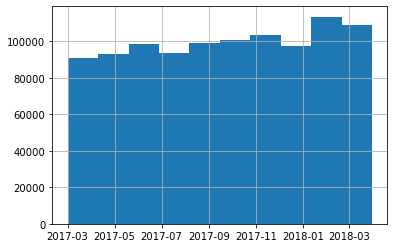

In [362]:
df.s2.astype('datetime64').hist()